In [1]:
!pip install tensorflow keras opencv-python numpy

In [6]:
import tensorflow as tf

def load_frozen_model(pb_path):
    # Load the frozen graph
    with tf.io.gfile.GFile(pb_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()  # Use tf.compat.v1.GraphDef here
        graph_def.ParseFromString(f.read())

    # Import the graph and return it as the default graph
    with tf.compat.v1.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")

    return graph

# Path to the frozen graph
pb_path = r"C:\Users\ALLAN DRACO\Downloads\Untitled Folder\Emergency-Vehicle-Detection-using-Image-Processing-master\frozen_inference_graph.pb"
graph = load_frozen_model(pb_path)

In [13]:
import cv2

# Load an image
image_path = "C:/Users/ALLAN DRACO/Downloads/Untitled Folder/Emergency-Vehicle-Detection-using-Image-Processing-master/Emergency-Vehicle-Detection-using-Image-Processing-master/test_image3.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (300, 300))  # Resize to the input size expected by the model
image_expanded = image_resized[None, ...]  # Add an extra dimension to make it [1, height, width, channels]

In [14]:
with tf.compat.v1.Session(graph=graph) as sess:
    # Fetch the input and output tensors by name
    input_tensor = graph.get_tensor_by_name("image_tensor:0")
    boxes = graph.get_tensor_by_name("detection_boxes:0")
    scores = graph.get_tensor_by_name("detection_scores:0")
    classes = graph.get_tensor_by_name("detection_classes:0")
    num_detections = graph.get_tensor_by_name("num_detections:0")

    # Run the model and get the outputs
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={input_tensor: image_expanded}
    )

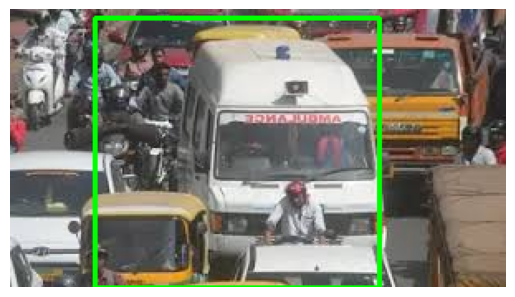

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to draw bounding boxes
def draw_boxes(image, boxes, scores, classes, score_threshold=0.5):
    height, width, _ = image.shape
    for i in range(int(num_detections[0])):
        if scores[0][i] > score_threshold:  # Only draw boxes above the threshold
            box = boxes[0][i]
            ymin, xmin, ymax, xmax = box

            # Convert coordinates to pixel values
            xmin = int(xmin * width)
            xmax = int(xmax * width)
            ymin = int(ymin * height)
            ymax = int(ymax * height)

            # Draw the bounding box
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

            # Add label
            class_id = int(classes[0][i])
            label = f"Class: {class_id}, Score: {scores[0][i]:.2f}"
            cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Draw boxes on the original image (not resized)
draw_boxes(image, boxes, scores, classes)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()